In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [3]:
with open("../ressources/dpo_rl_model_25-01-08_s14-s18-200x25/dataset.pickle", "rb") as file:
    original_df = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: '../ressources/dpo_rl_model_25-01-08_s14-s18-200x25/dataset.pickle'

In [4]:
original_df

,description,configuration,parameters,argos,type,scores_bt1,scores_bt2,bt1,bt2,scores_bt1_scaled,scores_bt2_scaled,chosen,rejected,score_chosen,score_rejected,dataset_position
0,The environment features a circle composed of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-5.677823,-3.023204,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.941293,0.988999,<s>[INST] The environment features a circle co...,<s>[INST] The environment features a circle co...,0.988999,0.941293,0
1,The rectangular area has dimensions 4.49 m x 7...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-5.866004,-7.284443,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.879954,0.847480,<s>[INST] The rectangular area has dimensions ...,<s>[INST] The rectangular area has dimensions ...,0.879954,0.847480,0
2,"With a radius of 3.54 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-13.42345,-9.359904,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.706933,0.799964,"<s>[INST] With a radius of 3.54 meters, the ci...","<s>[INST] With a radius of 3.54 meters, the ci...",0.799964,0.706933,0
3,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-15.45457,-30.78495,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.765597,0.490097,"<s>[INST] In this setting, a circular arena wi...","<s>[INST] In this setting, a circular arena wi...",0.765597,0.490097,0
4,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-16.87592,-15.92685,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.627892,0.649620,<s>[INST] The environment is constructed as a ...,<s>[INST] The environment is constructed as a ...,0.649620,0.627892,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Foraging,0.0,0.0,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.000000,0.000000,"<s>[INST] In this setting, a circular arena wi...","<s>[INST] In this setting, a circular arena wi...",0.000000,0.000000,9
547,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Foraging,0.3,0.6,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.028571,0.057143,<s>[INST] The environment is constructed as a ...,<s>[INST] The environment is constructed as a ...,0.057143,0.028571,9
548,"With a radius of 1.61 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-9.129376,-9.838721,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,1.000000,0.932621,"<s>[INST] With a radius of 1.61 meters, the ci...","<s>[INST]

In [5]:
df = original_df

In [6]:
df['average_score'] = (df['scores_bt1'] + df['scores_bt2']) / 2

# Step 2: Group by 'type' and 'dataset_position' and calculate the mean of the average scores
result = df.groupby(['dataset_position','type',])['average_score'].mean().reset_index()

# Display the result
print(result)

    dataset_position          type average_score
0                  0   Aggregation      0.281711
1                  0    Connection    -15.727776
2                  0  Distribution    -11.364015
3                  0      Foraging      1.071429
4                  1   Aggregation      0.221508
5                  1    Connection    -16.070307
6                  1  Distribution    -12.171265
7                  1      Foraging      0.669048
8                  2   Aggregation      0.246362
9                  2    Connection    -15.086307
10                 2  Distribution    -12.270116
11                 2      Foraging      1.092857
12                 3   Aggregation      0.247397
13                 3    Connection    -16.596363
14                 3  Distribution    -12.035965
15                 3      Foraging      1.021429
16                 4   Aggregation      0.322728
17                 4    Connection    -16.261299
18                 4  Distribution    -11.737884
19                 4

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

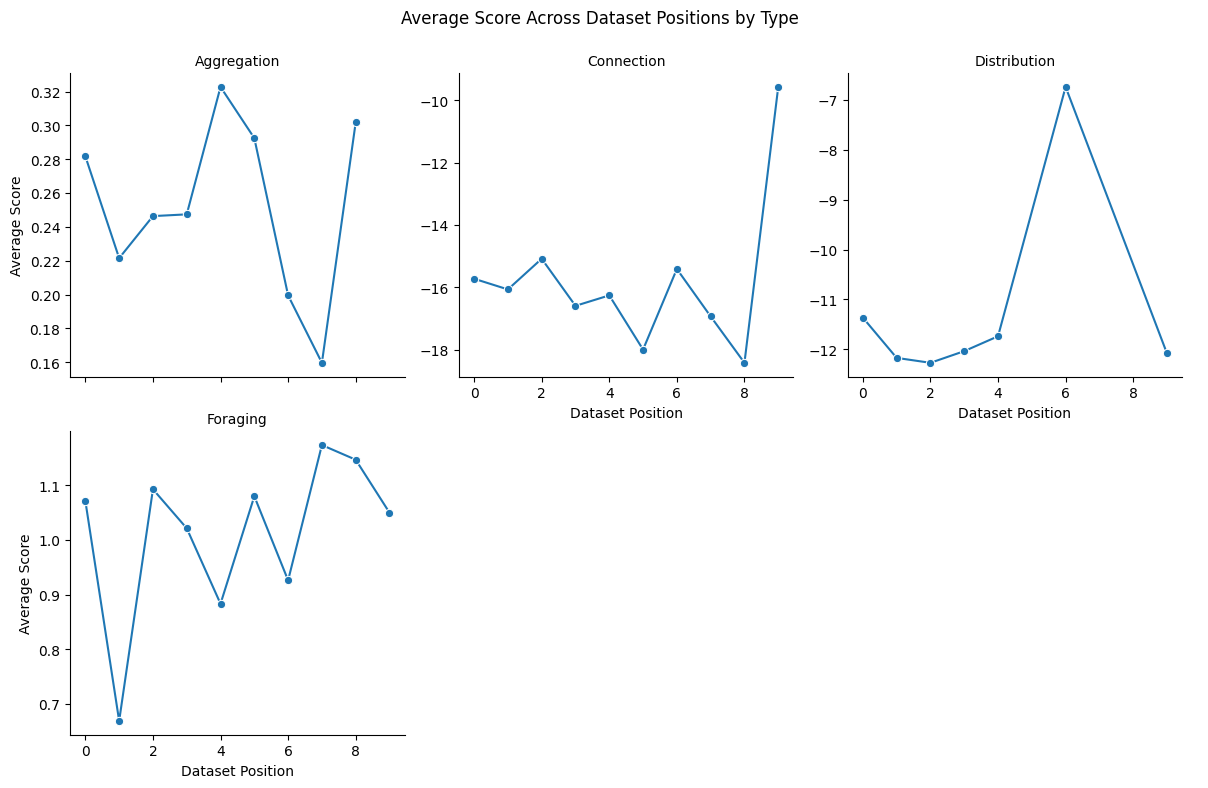

In [8]:
# Step 3: Create a FacetGrid using seaborn
g = sns.FacetGrid(result, col='type', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'dataset_position', 'average_score', marker='o')

# Step 4: Add titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Dataset Position", "Average Score")
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average Score Across Dataset Positions by Type')
plt.show()